In this notebook we shall try to remove duplicates from the icsd csv file and then store the Elements(and their frequencies) for each unique composition.

# Deleting Duplicate Entries Based on Unique Compositions

In [1]:
from __future__ import division, print_function

import pylab as plt
import matplotlib.pyplot as mpl
from pymatgen.core import Element, Composition


%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We import all the data and check the unique compositions by string matching of the pymatgen formulas. We then make a list out of all the unique entries and write them to a file called Unique_ICSD.dat in the ICSD subfolder.

In [2]:
import csv

with open("ICSD/icsd-ternaries.csv", "r") as f:
    csv_reader = csv.reader(f, dialect = csv.excel_tab)
    data = [line for line in csv_reader]

In [3]:
formulas = [line[2] for line in data]
compositions = [Composition(x) for x in formulas]
unique_formulas = list(set(formulas))
unique_compositions = set(Composition(f).formula for f in unique_formulas)

In [4]:
unique_data=[]
found_comps=[]
for line in data:
    form=Composition(line[2]).formula 
    if form not in found_comps:
        unique_data.append(line)
        found_comps.append(form)

In [5]:
with open("ICSD/Unique_ICSD.dat","w") as f:
    for line in unique_data:
        print("\t".join(line),end='\n',file=f)

Just to check that everything worked out fine, we check that the number of entries in the list we just wrote to file is the same as number of unique compositions found by chuck in the ICSD_ternaries notebook. 

In [6]:
print("Number of unique compositions found by Chuck:", len(unique_compositions))
print("Number of lines we just wrote to file:",len(unique_data))

Number of unique compositions found by Chuck: 42035
Number of lines we just wrote to file: 42035


From now on, this becomes our default datafile. Let us now try to import it in the same way as in Cleaning_spacegroups.ipynb and see if the spacegroup number parsing works. 

In [7]:
with open('ICSD/Unique_ICSD.dat','r') as f:
            data_1=csv.reader(f,"excel-tab")
            list_data1=[[element.strip() for element in row] for row in data_1]
for row1 in list_data1:
    row1[1]=row1[1].replace(' ','')
list_space=[row1[1].rstrip('Z').rstrip('S').rstrip("H").rstrip('R') for row1 in list_data1]

In [8]:
with open("ICSD/spacegroups.dat",'r') as f:
    dat=csv.reader(f,dialect='excel-tab',quoting=csv.QUOTE_NONE)
    list_dat=[element.strip() for row in dat for element in row ]
    list1=[[int(list_dat[i*2]),list_dat[i*2+1]] for i in range(int(len(list_dat)/2))]
dict_space={}
for i in range(len(list1)):
    dict_space[list1[i][1]]=list1[i][0]
with open('ICSD/spacegroups_2.dat','r') as f1:
        f=f1.readlines()
        for line in f:
            data2=[element.strip() for element in line.split()]
            if data2[1] not in dict_space.keys():
                dict_space[data2[1]]=int(data2[0])
                
with open('ICSD/spacegroups_3.dat','r') as f1:
        f=f1.readlines()
        for line in f:
            data3=[element.strip() for element in line.split()]
            if data3[0] not in dict_space.keys():
                dict_space[data3[0]]=int(data3[1]) 

Found Entries=42035, Not Found Entries=0
Found No Entries for these spacegroups [[ 27  48  89  93 153 170 171 172 179 184 192 207 211]]


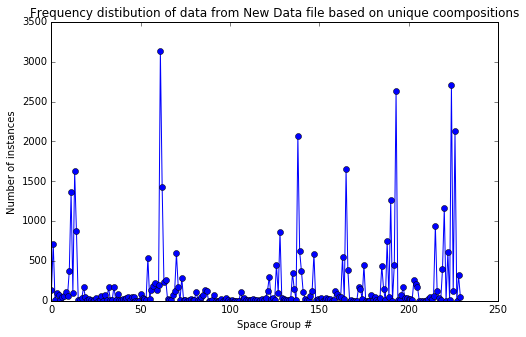

In [9]:
plt.figure(figsize = (8,5))
list_nf=[]
count_f=plt.array([0]*230)
count_not=0
for s in list_space:
    if s in dict_space.keys():
        #print "Found Element in dictionary for space_group_name {0}, with space_group number {1}".format(s,dict_space[s])
        count_f[dict_space[s]-1]+=1
    else:
        #print "Entry not found for space group name ",s
        list_nf.append(s)
print("Found Entries={0}, Not Found Entries={1}".format(sum(count_f),len(list_space)-sum(count_f)))
print("Found No Entries for these spacegroups",plt.array(plt.where(count_f==0))+1)
plt.xlabel("Space Group #")
plt.ylabel("Number of instances")
plt.title("Frequency distibution of data from New Data file based on unique coompositions")
plt.plot(plt.arange(230),count_f,'bo-')

 SG Count
--- -----
 62  3133
225  2709
194  2633
227  2127
139  2072
166  1654
 14  1623
 63  1424
 12  1365
191  1261
221  1159
216   943
 15   874
129   863
189   746
  2   716
140   621
223   612
 71   595
148   587


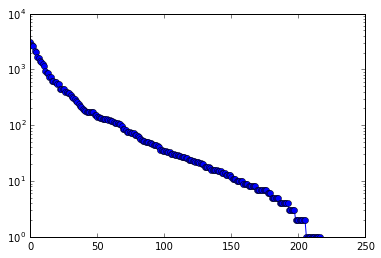

In [10]:
sg_counts = sorted(enumerate(count_f,1), key = lambda x: x[1], reverse = True)
print(" SG Count")
print("--- -----")
for i in range(20):
    sg,count = sg_counts[i]
    print("{:3}  {:4}".format(sg, count))
plt.semilogy(range(len(sg_counts)), [e[1] for e in sg_counts], "o-")

By comparing the output from Cleaning_spacegroups.ipynb, we see that there are 5 new spacegroups that now have no instances. Also the number of instances of each of the spacegroups has dropped drastically. So some compositions clearly exist in multiple spacegroups and therefore just using compositions to mark unque entries is probably a bad idea. Let us import the mother datafile and see how many entries the newly empty spacegroups had originally.

In [11]:
with open('ICSD/icsd-ternaries.csv','r') as f:
            data=csv.reader(f,"excel-tab")
            list_data=[[element.strip() for element in row] for row in data]
for row in list_data:
    row[1]=row[1].replace(' ','')
list_space_old=[row[1].rstrip('Z').rstrip('S').rstrip("H").rstrip('R') for row in list_data]

Found Entries=68064, Not Found Entries=0
Found No Entries for these spacegroups [[ 48  89  93 153 170 171 172 211]]


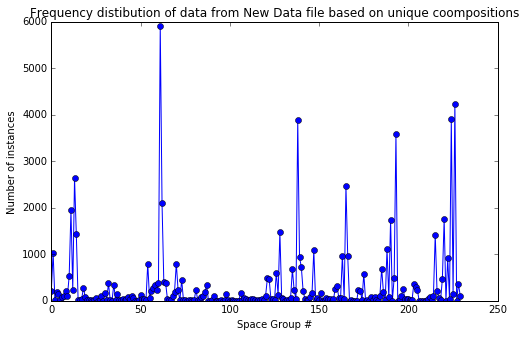

In [12]:
plt.figure(figsize = (8,5))
list_nf_old=[]
count_f_old=plt.array([0]*230)
count_not_old=0
for s in list_space_old:
    if s in dict_space.keys():
        #print "Found Element in dictionary for space_group_name {0}, with space_group number {1}".format(s,dict_space[s])
        count_f_old[dict_space[s]-1]+=1
    else:
        #print "Entry not found for space group name ",s
        list_nf_old.append(s)
print("Found Entries={0}, Not Found Entries={1}".format(sum(count_f_old),len(list_space_old)-sum(count_f_old)))
print("Found No Entries for these spacegroups",plt.array(plt.where(count_f_old==0))+1)
plt.xlabel("Space Group #")
plt.ylabel("Number of instances")
plt.title("Frequency distibution of data from New Data file based on unique coompositions")
plt.plot(plt.arange(230),count_f_old,'bo-')

In [13]:
for a in [27,48,89,93,153,170,171,172,179,184,192,207,211]:
    print(a,count_f_old[a-1])

27 3
48 0
89 0
93 0
153 0
170 0
171 0
172 0
179 1
184 5
192 2
207 1
211 0


We see that the newly empty groups had very little data in the first place. But we definitely need to have more sophisticated methods for catching data duplication.

# Parsing Stoichiometry for every composition 

In [14]:
from pymatgen.matproj.rest import MPRester


In [15]:
def desired_element(elem):
    omit = ['Po', 'At', 'Rn', 'Fr', 'Ra']
    return not e.is_noble_gas and not e.is_actinoid and not e.symbol in omit
#element_universe = [str(e) for e in Element if desired_element(e)]
element_universe = [str(e) for e in Element]
dict_element={}
for i,j in enumerate(element_universe):
    dict_element[str(j)]=i
print("Number of included elements =", len(element_universe))

Number of included elements = 103


Some Compositions have Deutorium and Tritium. Right now I am creating new elements entry for D and T with array indices 103 and 104. We might want to map these to Hydrogen later. In that case the cell below would be:
dict_element['D']=dict_element['H'].value()
dict_element['T']=dict_element['H'].value()

In [16]:
dict_element['D']=103
dict_element['T']=104

In [17]:
print(dict_element.keys())

['Ru', 'Re', 'Ra', 'Rb', 'Rn', 'Rh', 'Be', 'Ba', 'Bi', 'Bk', 'Br', 'D', 'H', 'P', 'T', 'Os', 'Hg', 'Ge', 'Gd', 'Ga', 'Pr', 'Pt', 'Pu', 'C', 'Pb', 'Pa', 'Pd', 'Xe', 'Po', 'Pm', 'Ho', 'Hf', 'Mo', 'He', 'Md', 'Mg', 'K', 'Mn', 'O', 'Zr', 'S', 'W', 'Zn', 'Eu', 'Es', 'Er', 'Ni', 'No', 'Na', 'Nb', 'Nd', 'Ne', 'Np', 'Fr', 'Fe', 'Fm', 'B', 'F', 'Sr', 'N', 'Kr', 'Si', 'Sn', 'Sm', 'V', 'Sc', 'Sb', 'Se', 'Co', 'Cm', 'Cl', 'Ca', 'Cf', 'Ce', 'Cd', 'Tm', 'Cs', 'Cr', 'Cu', 'La', 'Li', 'Tl', 'Lu', 'Lr', 'Th', 'Ti', 'Te', 'Tb', 'Tc', 'Ta', 'Yb', 'Dy', 'I', 'U', 'Y', 'Ac', 'Ag', 'Ir', 'Am', 'Al', 'As', 'Ar', 'Au', 'At', 'In']


In [18]:
import numpy as np

In [19]:
stoich_array=np.zeros((len(list_data1),len(dict_element)),dtype=float)
for index,entry in enumerate(list_data1):
    comp=Composition(entry[2])
    temp_dict=dict(comp.get_el_amt_dict())
    #print(index,temp_dict.keys())
    for key in temp_dict.keys():
        if dict_element.has_key(key):
            stoich_array[index][dict_element[key]]= temp_dict[key]
        else:
            print("For line_number {0}, we did not find element {1} in formula {2} in line with entry number {3}".format(index,key,comp.formula,entry[0]))


In [20]:
print("Entry Number  Element list           Number of occurances ")
print("------------  --------------       ------------------------- ")
dict_inverse = dict ( (v,k) for k, v in dict_element.items() )
for i, entry in enumerate(stoich_array[0:20]):
    nzentries=np.where(entry!=0)[0]
    present_els=[dict_inverse[ent] for ent in nzentries]
    print("{:<13} {:<22} {:<10}".format(i,present_els,entry[nzentries]))

Entry Number  Element list           Number of occurances 
------------  --------------       ------------------------- 
0             ['Ag', 'Ge', 'Te']     [ 8.  1.  6.]
1             ['O', 'Pb', 'W']       [ 4.  1.  1.]
2             ['Mo', 'Pb', 'Se']     [ 3.   0.5  4. ]
3             ['Br', 'Cu', 'Te']     [ 1.  1.  1.]
4             ['Fe', 'I', 'O']       [ 1.  3.  9.]
5             ['Cd', 'N', 'O']       [ 1.  2.  6.]
6             ['Fe', 'S', 'Si']      [ 2.  4.  1.]
7             ['Fe', 'Ge', 'S']      [ 2.  1.  4.]
8             ['Ga', 'O', 'Ti']      [  3.46  48.    21.54]
9             ['Ag', 'N', 'O']       [ 1.  1.  3.]
10            ['Ga', 'Mn', 'Se']     [ 2.  1.  4.]
11            ['Cr', 'P', 'S']       [ 1.  1.  4.]
12            ['Ge', 'Pt', 'Se']     [ 1.  1.  1.]
13            ['Cu', 'S', 'Sn']      [ 4.  4.  1.]
14            ['Co', 'O', 'Si']      [ 2.  4.  1.]
15            ['Cl', 'Mn', 'O']      [  3.   8.  10.]
16            ['Ag', 'P', 'S']       [ 4.  2.  7

Storing this array as a sparse csr matrix and outputting the first 10 entries just to show how the storage is done.

In [26]:
import scipy.sparse 
sparse_stoich=scipy.sparse.csr_matrix(stoich_array)
print(sparse_stoich[0:10])

  (0, 1)	8.0
  (0, 35)	1.0
  (0, 90)	6.0
  (1, 62)	4.0
  (1, 66)	1.0
  (1, 97)	1.0
  (2, 53)	3.0
  (2, 66)	0.5
  (2, 82)	4.0
  (3, 13)	1.0
  (3, 24)	1.0
  (3, 90)	1.0
  (4, 30)	1.0
  (4, 41)	3.0
  (4, 62)	9.0
  (5, 16)	1.0
  (5, 54)	2.0
  (5, 62)	6.0
  (6, 30)	2.0
  (6, 79)	4.0
  (6, 83)	1.0
  (7, 30)	2.0
  (7, 35)	1.0
  (7, 79)	4.0
  (8, 33)	3.46
  (8, 62)	48.0
  (8, 92)	21.54
  (9, 1)	1.0
  (9, 54)	1.0
  (9, 62)	3.0
